# Perbandingan Rekomendasi Film Berdasarkan Cosine Similarity dan Sumber Eksternal (CBR.com) untuk Film Avatar (2009)

## Business Understanding

### Problem Statement

Rumusan masalah pada proyek ini adalah :
- Dilansir dari Website Rotten Tomatoes tentang film dengan penghasilan tertinggi sepanjang masa, Avatar (2009) merupakan film no. 1 dengan penghasilan tertinggi, dengan metode Content-Based Filtering, film apakah yang akan direkomendasikan untuk film yang mirip dengan Avatar?
- Bagaimana perbedaan antara film yang direkomendasikan oleh model dengan film yang direkomendasikan oleh manusia?

### Goals

Tujuan dari menyelesaikan permasalahan diatas adalah :
- Mengetahui rekomendasi lain mengenai film yang mirip dengan Avatar (2009)
- Mengetahui seberapa akurat rekomendasi yang diberikan oleh model, jika dibandingkan dengan rekomendasi yang diberikan oleh manusia

### Solution Statement

- Menggunakan pendekatan Content-based Filtering untuk mengetahui film yang mirip dengan Avatar(2009)
- Menggunakan Metrik Evaluasi Precission@k untuk melihat perbandingan dari rekomendasi yang diberikan model, dengan rekomendasi yang diberikan oleh manusia

### Metodologi

Tujuan yang ingin dicapai dari proyek ini adalah, Mengetahui seberapa baik model machine learning dapat memberikan rekomendasi film dari data-data diberikan. Untuk mengetahuinya, kita perlu memberikan perbandingan dari rekomendasi yang diberikan oleh manusia dengan rekomendasi yang diberikan oleh model. Untuk itu, kita akan menggunakan Cosine Similarity dalam membuat Sistem Rekomendasi melalui pendekatan Item-based Filtering, dan menggunakan Metrik Evaluasi Precission@k dalam menilai seberapa baik model dalam memberikan rekomendasi film.

### Metrik

Untuk Metrik dalam mengukur Similarity, ada beberapa metrik yang dapat digunakan, diantaranya Cosine Similarity, Euclidean Distance, Jaccard Similarity, dan Pearson Correlation Coefficient adalah empat metrik populer untuk mengukur kesamaan atau jarak antar data. Cosine Similarity mengukur sudut antara dua vektor dalam ruang berdimensi tinggi, cocok untuk data teks atau rating karena memperhatikan arah, bukan besaran. Euclidean Distance menghitung jarak lurus antara dua titik, umum digunakan untuk data numerik dan posisi. Jaccard Similarity mengukur seberapa besar kesamaan antara dua himpunan dibandingkan total elemen uniknya, ideal untuk data kategorikal atau biner seperti genre film. Sementara itu, Pearson Correlation Coefficient mengukur kekuatan dan arah hubungan linear antara dua variabel, sering digunakan dalam sistem rekomendasi berbasis rating untuk memahami pola preferensi pengguna. Namun pada proyek kali ini, kita akan menggunakan Metrik Evaluasi Cosine Similarity karena mampu mengukur kemiripan antar film berdasarkan informasi seperti genre, sutradara, dan penulis yang dapat diubah menjadi representasi vektor. Metode ini fokus pada arah vektor, bukan besarannya, sehingga efektif untuk data teks yang bersifat sparse. Dalam sistem rekomendasi berbasis item, cosine similarity membantu menemukan film yang paling mirip secara konten dengan film tertentu secara efisien dan akurat.

## Data Understanding

### Data Understanding

Data Understanding merupakan proses pada analisia data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

### Data Loading

Data Loading merupakan proses memuat dataset yang akan digunakan untuk membangun model machine learning

### Informasi Dataset

| **Jenis**     | **Keterangan**                                                                                       |
|---------------|------------------------------------------------------------------------------------------------------|
| **Title**     | 16000+ Movies 1910-2024 (Metacritic)                                                                 |
| **Source**    | [Kaggle](https://www.kaggle.com/datasets/kashifsahil/16000-movies-1910-2024-metacritic)              |
| **Owner**     | [KashifSahil](https://www.kaggle.com/kashifsahil)                                                    |
| **License**   | Database: Open Database, Contents                                                                    |
| **Visibility**| Publik                                                                                               |
| **Tags**      | Movies and TV Shows, Arts and Entertainment, Data Analytics, Data Visualization, Recommender System  |
| **Usability** | 10.00                                                                                                |

In [1]:
import pandas as pd
df=pd.read_csv('16k_Movies.csv')
df

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"
...,...,...,...,...,...,...,...,...,...,...
16285,16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,NaN,NaN,NaN,NaN,\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",NaN,NaN,Michelle Esrick,NaN,Not Rated,Documentary
16287,16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,NaN,NaN,Julian P. Hobbs,NaN,1 h 20 m,Documentary
16288,16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"


Dataset yang digunakan memiliki total 10 kolom dengan 16290 baris

In [2]:
df[df['Title'] == 'Avatar']

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
1096,1096,Avatar,"Dec 18, 2009",Jake Sully is a former Marine confined to a wh...,7.3,"2,023",James Cameron,James Cameron,2 h 42 m,"Action,Adventure,Fantasy,Sci-Fi"


Terlihat bahwa dataset tersebut memiliki film dengan judul Avatar yang rilis pada tahun 2009, maka dataset ini bisa digunakan dalam menjawab rumusan masalah kita

## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


dari otuptu diatas dapat dilihat bahwa:
- Unnamed: 0 memiliki 16290 data dengan tipe integer
- Title memiliki 16290 data bertipe object
- Release Date memiliki 16290 data bertipe object (seharusnya date time)
- Rating memiliki 12846 data bertipe float
- No of Persons Voted berisi 12829 data bertipe object (seharusnya integer)
- Directed by berisi 16283 data bertipe object
- Written by berisi 15327 data bertipe object
- Duration berisi 16277 data bertipe object
- Genres berisi 16285 data bertipe object

terlihat juga ada beberapa kolom yang berjumlah tidak sama, ini artinya terdapat missing value, maka kita akan mengatasinya pada proses PreProcessing, selanjutnya kita akan melihat data unik pada Genres, Directed by, dan Written by

In [4]:
print('Banyak genre: ', len(df.Genres.unique()))
print('Banyak data: ', len(df['Written by'].unique()))
print('Banyak data: ', len(df['Directed by'].unique()))

Banyak genre:  1664
Banyak data:  11788
Banyak data:  7380


dapat disimpulkan bahwa, dalam dataset terdapat 1664 data dengan genre berbeda, 11788 data dengan penulis berbeda, dan 7380 data dengan sutradara yang berbeda.

In [5]:
print(df['Rating'].describe())

count    12846.000000
mean         6.617632
std          1.415272
min          0.300000
25%          5.800000
50%          6.800000
75%          7.600000
max         10.000000
Name: Rating, dtype: float64


Terlihat bahwa rating memiliki nilai maksimum 10, dengan rata-rata 6.6

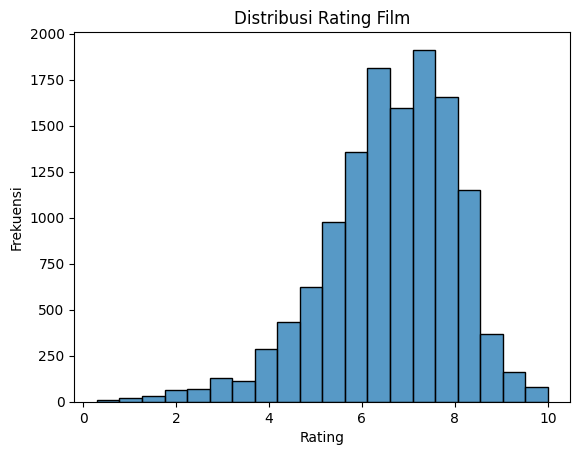

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Rating'], bins=20)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

terlihat bahwa pada fitur rating, film dengan rating 7 adalah frekuensi terbanyak

### Mengetahui jumlah missing value pada tiap kolom

In [7]:
df.isna().sum()

Unnamed: 0                0
Title                     0
Release Date              0
Description               0
Rating                 3444
No of Persons Voted    3461
Directed by               7
Written by              963
Duration                 13
Genres                    5
dtype: int64

terlihat bahwa terdapat beberapa kolom yang berisi nilai NaN, yaitu pada kolom:
- Rating
- No of Persons Voted
- Directed by
- Written by
- Duration
- Genres

namun sebelum drop kolom-kolom yang memiliki nilai NaN, kita akan drop terlebih dahulu kolom yang tidak akan digunakan pada model, yaitu Duration, Release Date, No of Persons Voted, dan Unnamed: 0, alasannya antara lain:
- Duration hanya berisi durasi dari film tersebut
- Release Date berisi informasi mengenai kapan film tersebut rilis
- Unnamed: 0 hanya berisi nomor kolom
- No of Persons Voted : berisi jumlah orang yang sudah vote

### Mengetahui jumlah data duplikat

In [8]:
df['Title'].duplicated().sum()

np.int64(1597)

Judul merupakan data yang isinya tidak mungkin sama, dan Terlihat bahwa terdapat 1275 data duplikat pada kolom Title, oleh karena itu kita akan drop kolom-kolom tersebut

## Data Preprocessing

### Drop kolom yang tidak relevan

In [9]:
df = df.drop(['Unnamed: 0', 'Release Date', 'No of Persons Voted', 'Duration'], axis=1)
df

,Title,Description,Rating,Directed by,Written by,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,7.4,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,8.3,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",7.3,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",Drama
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...","Drama,History"
...,...,...,...,...,...,...
16285,Boys to Men,Compilation of 4 short films from different di...,NaN,NaN,NaN,Drama
16286,Saint Misbehavin': The Wavy Gravy Movie,"Beginning with Woodstock ‘99, director Michell...",NaN,Michelle Esrick,NaN,Documentary
16287,Collectors,America is drawn to the macabre handiwork of t...,NaN,Julian P. Hobbs,NaN,Documentary
16288,Bonhoeffer,Dramatic documentary about the young German pa...,NaN,Martin Doblmeier,Martin Doblmeier,"Documentary,Biography,History,War"


### Drop kolom yang berisi missing value

In [10]:
df=df.dropna()
df

,Title,Description,Rating,Directed by,Written by,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,7.4,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,8.3,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",7.3,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",Drama
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...","Drama,History"
...,...,...,...,...,...,...
16277,The Garbage Pail Kids Movie,Dodger must confront the struggles of life as ...,1.0,Rod Amateau,"Linda Palmer, Rod Amateau, John Pound","Adventure,Comedy,Family,Fantasy,Musical"
16278,Death of a Nation,Not since 1860 have the Democrats so fanatical...,4.3,"Dinesh D'Souza, \n \n Bruce Schooley","Dinesh D'Souza, Bruce Schooley","Documentary,History"
16279,United Passions,"Three men—Jules Rimet (Gérard Depardieu), Joao...",0.8,Frédéric Auburtin,"Frédéric Auburtin, Jean-Paul Delfino","Drama,History,Sport"
16280,Bio-Dome,Five brave scientists are forced to face life ...,8.0,Jason Bloom,"Adam Leff, Mitchell Peck, Jason Blumenthal, Ki...",Comedy


### Drop Kolom yang Berisi Data Duplikat

In [11]:
df = df.drop_duplicates('Title')
df

,Title,Description,Rating,Directed by,Written by,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,7.4,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,8.3,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",7.3,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",Drama
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...","Drama,History"
...,...,...,...,...,...,...
16277,The Garbage Pail Kids Movie,Dodger must confront the struggles of life as ...,1.0,Rod Amateau,"Linda Palmer, Rod Amateau, John Pound","Adventure,Comedy,Family,Fantasy,Musical"
16278,Death of a Nation,Not since 1860 have the Democrats so fanatical...,4.3,"Dinesh D'Souza, \n \n Bruce Schooley","Dinesh D'Souza, Bruce Schooley","Documentary,History"
16279,United Passions,"Three men—Jules Rimet (Gérard Depardieu), Joao...",0.8,Frédéric Auburtin,"Frédéric Auburtin, Jean-Paul Delfino","Drama,History,Sport"
16280,Bio-Dome,Five brave scientists are forced to face life ...,8.0,Jason Bloom,"Adam Leff, Mitchell Peck, Jason Blumenthal, Ki...",Comedy


Terlihat bahwa jumlah baris telah berkurang menjadi 11076 baris dengan 6 kolom

### Text Preprocessing

#### Menghilangkan \n pada teks

In [12]:
df_clean=df.copy()
df_clean = df_clean.replace('\n', ' ', regex=True)
df_clean

,Title,Description,Rating,Directed by,Written by,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,7.4,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,8.3,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",7.3,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",Drama
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...","Drama,History"
...,...,...,...,...,...,...
16277,The Garbage Pail Kids Movie,Dodger must confront the struggles of life as ...,1.0,Rod Amateau,"Linda Palmer, Rod Amateau, John Pound","Adventure,Comedy,Family,Fantasy,Musical"
16278,Death of a Nation,Not since 1860 have the Democrats so fanatical...,4.3,"Dinesh D'Souza, Bruce Schooley","Dinesh D'Souza, Bruce Schooley","Documentary,History"
16279,United Passions,"Three men—Jules Rimet (Gérard Depardieu), Joao...",0.8,Frédéric Auburtin,"Frédéric Auburtin, Jean-Paul Delfino","Drama,History,Sport"
16280,Bio-Dome,Five brave scientists are forced to face life ...,8.0,Jason Bloom,"Adam Leff, Mitchell Peck, Jason Blumenthal, Ki...",Comedy


terlihat bahwa penulisan "Dinesh D'Souza, \n \n Bruce Schooley" pada kolom Directed bysudah menjadi "Dinesh D'Souza, Bruce Schooley"

#### Menghilangkan tanda baca, dan case folding

In [13]:
kolom_teks = ['Description', 'Directed by', 'Written by']

df_clean[kolom_teks] = df_clean[kolom_teks].apply(
    lambda col: col
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.lower()
        .str.strip()                          
)

df_clean['Genres'] = (
    df_clean['Genres']
        .str.replace(r'[^\w\s]', ' ', regex=True)
        .str.lower()
        .str.strip()
)

Disini saya menghilangkan tanda baca dan melakukan case folding pada fitur Description, Directed by, dan Written by, kemudian melakukan juga proses yang sama pada Genres namun mengganti tanda baca menjadi spasi

#### Lemmatization dan stop word removal pada fitur Description

In [14]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Proses kolom 'Description'
df_clean['Description'] = df_clean['Description'].apply(
    lambda x: ' '.join([
        token.lemma_ for token in nlp(x)
        if not token.is_stop and not token.is_punct and not token.is_space
    ])
)

Disini yang saya lakukan adalah:
- Melakukan Lemmatization untuk mengembalikan kata-kata yang ada menjadi bentuk asal
- Melakukan Stop Word Remocal untuk meningkatkan akurasi

#### Menggabungkan Description, Directed by, Written by, dan Genres kedalam 1 kolom bernama info

In [15]:
data = df_clean
data['info'] = data['Genres'] + ' ' + data['Directed by'] + ' ' + data['Written by'] + ' ' + data['Description']
data.drop(['Genres', 'Directed by', 'Written by', 'Description', 'Rating'], axis=1, inplace=True)
data.head()

,Title,info
0,Dekalog (1988),drama krzysztof kieslowski krzysztof kieslowsk...
1,Three Colors: Red,drama mystery romance krzysztof kieslowski krz...
2,The Conformist,drama bernardo bertolucci alberto moravia bern...
3,Tokyo Story,drama yasujirô ozu kôgo noda yasujirô ozu yasu...
4,The Leopard (re-release),drama history luchino visconti giuseppe tomasi...


karena fitur Description, Directed by, Written by, dan Genres sudah digabung menjadi satu string kedalam 'fitur', maka kita bisa drop kolom-kolom tersebut. Kemudian untuk fitur Rating, kita drop juga karena fitur ini tidak akan digunakan pada Content-based filtering

### Ekstraksi Fitur dan Pembobotan Term Menggunakan TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['info'])
tfidf_matrix.shape

(11076, 44362)

Pada proses ini, berikut adalah hal-hal yang dilakukan:
- Memanggil class TfidfVectorizer pada modul Scikit Learn
- Mengubah data pada kolom info menjadi array

In [17]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(11076, 44362))

Disini saya mengubah tfidf_matrix kedalam bentuk matrix dengan fungsi todense()

In [18]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=vectorizer.get_feature_names_out(),
    index=data.Title
).sample(22, axis=1).sample(10, axis=0)

,overage,dumb,tambini,diamondheist,abas,cyd,dickey,350foot,naihoi,lagravenese,...,neng,doyne,boadilla,philippine,baffling,hairstyle,puccio,kindly,forth,untangle
Title,,,,,,,,,,,,,,,,,,,,,
Sordid Lives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost Rider: Spirit of Vengeance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Entourage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
We the Animals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Secret: Dare to Dream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ferrari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
There Will Be Blood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charlie Wilson's War,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pada proses diatas, yang dilakukan adalah:
- Membuat dataframe untuk melihat tf-idf matrix
- Kolom diisi dengan info
- Baris diisi dengan nama film

## Model Development dengan Content-based Filtering

### Cosine Similarity

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.00000000e+00, 3.20194868e-01, 6.37996415e-04, ...,
        6.58095344e-04, 1.63621246e-02, 1.38772472e-03],
       [3.20194868e-01, 1.00000000e+00, 6.58119316e-02, ...,
        7.45279663e-04, 2.42120150e-03, 1.57157017e-03],
       [6.37996415e-04, 6.58119316e-02, 1.00000000e+00, ...,
        1.08605882e-03, 0.00000000e+00, 1.40568635e-02],
       ...,
       [6.58095344e-04, 7.45279663e-04, 1.08605882e-03, ...,
        1.00000000e+00, 0.00000000e+00, 2.36231839e-03],
       [1.63621246e-02, 2.42120150e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.06625980e-02],
       [1.38772472e-03, 1.57157017e-03, 1.40568635e-02, ...,
        2.36231839e-03, 1.06625980e-02, 1.00000000e+00]],
      shape=(11076, 11076))

Pada proses ini, kita menghitung cosine similarity pada tfidf_matrix

In [20]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Title'], columns=data['Title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11076, 11076)


Title,Happy Together,The Insult,Inside Out 2,Wolf Totem,Penguin Bloom
Title,,,,,
Before the Devil Knows You're Dead,0.001514,0.009026,0.001140,0.004956,0.000795
Run Sweetheart Run,0.000000,0.007776,0.000000,0.003754,0.007538
Suzhou River,0.014630,0.000712,0.007114,0.003773,0.013588
A Lot Like Love,0.008865,0.001423,0.023284,0.001619,0.015743
Can You Ever Forgive Me?,0.001973,0.005097,0.016426,0.001386,0.022537
Once in a Lifetime: The Extraordinary Story of the New York Cosmos,0.000000,0.002587,0.033727,0.015338,0.040974
Sympathy for Delicious,0.002178,0.001345,0.001640,0.001530,0.001144
Miss Sloane,0.001846,0.004981,0.001391,0.017374,0.007985
Death Becomes Her,0.000000,0.000000,0.013937,0.000000,0.000000


pada proses diatas, hal yang dilakukan adalah:
- Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama Film
- Melihat similarity matrix pada setiap film

In [21]:
def film_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['Title', 'info']], k=10):
    index = similarity_data.loc[:, nama_film].to_numpy().argpartition(range(-1, -k-1, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_film, errors='ignore')

    # Ambil skor similarity-nya
    similarity_scores = similarity_data.loc[closest, nama_film].values

    # Gabungkan dengan info film
    rekomendasi_df = pd.DataFrame(closest, columns=["Title"])
    rekomendasi_df["Similarity"] = similarity_scores

    return rekomendasi_df.merge(items, on="Title").sort_values(by="Similarity", ascending=False).head(k)

pada proses ini, yang dilakukan adalah:
- Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan 
- Dataframe diubah menjadi numpy
- Urutan akan turun dari -1 sampai -k, dengan step -1
- Mengambil data dengan similarity terbesar dari index yang ada
- Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
- menggunakan k=10, artinya model akan memberikan rekomendasi sebanyak 10 film

In [22]:
data[data.Title.eq('Avatar')]

,Title,info
1096,Avatar,action adventure fantasy sci fi james cameron ...


In [23]:
film_recommendations('Avatar')

,Title,Similarity,info
0,Avatar: The Way of Water,0.293632,action adventure fantasy sci fi james cameron ...
1,5 Star Day,0.226471,drama romance danny buday danny buday jake gib...
2,To Save a Life,0.209381,drama brian baugh brian baugh jim britts save ...
3,Miss Peregrine's Home for Peculiar Children,0.197852,adventure drama family fantasy thriller tim bu...
4,Revolver,0.193388,action crime drama mystery thriller guy ritchi...
5,Self Reliance,0.192403,comedy thriller jake johnson jake johnson tomm...
6,Everybody Wants to Be Italian,0.172340,comedy romance jason todd ipson jason todd ips...
7,A Kid Like Jake,0.157935,drama silas howard daniel pearle brooklyn pare...
8,Just My Luck,0.146301,comedy fantasy romance donald petrie i marlene...
9,The Girl from the Naked Eye,0.143047,action crime mystery romance thriller david re...


Hasil diatas merupakan rekomendasi yang diberikan oleh model, kemudian kita akan menelusuri seberapa akuratnya rekomendasi yang diberikan jika kita bandingkan dengan Human Behaviour

In [24]:
import pandas as pd

ground_truth = {
    "Avatar": [
        "Annihilation",
        "Inception",
        "Interstellar",
        "Avatar: The Way of Water",
        "Prometheus",
        "Pocahontas",
        "Oblivion",
        "Atlantis: The Lost Empire",
        "Valerian and the City of a Thousand Planets",
        "Stargate",
        "Dune"
    ]
}

def precision_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    relevant_set = set(relevant)
    hits = sum([1 for item in recommended_at_k if item in relevant_set])
    return hits / k

# Ambil hasil rekomendasi untuk film "Avatar"
rekomendasi = film_recommendations("Avatar")["Title"].tolist()

# Hitung precision@k untuk k = 1 hingga 10
results = []
for k in range(1, 11):
    prec = precision_at_k(rekomendasi, ground_truth["Avatar"], k)
    results.append({'k': k, 'Precision@k': prec})

# Buat DataFrame
precision_df = pd.DataFrame(results)

# Hitung Mean Average Precision@K
map_k = precision_df["Precision@k"].mean()

# Tampilkan hasil
print("==================================== Hasil Evaluasi =========================================\n")
print(precision_df.to_string(index=False))
print(f"\nMean Average Precision@10 (MAP@10): {map_k:.4f}")

==================================== Hasil Evaluasi =========================================

 k  Precision@k
 1     1.000000
 2     0.500000
 3     0.333333
 4     0.250000
 5     0.200000
 6     0.166667
 7     0.142857
 8     0.125000
 9     0.111111
10     0.100000

Mean Average Precision@10 (MAP@10): 0.2929


Disini kita menggunakan Metrik Evaluasi Presiccion@k, Metrik ini mengukur seberapa relevan item-item yang direkomendasikan di antara k item teratas yang diberikan oleh sistem. pada variabel ground_truth saya mengisi film-film yang mirip dengan Avatar (2009) berdasarkan informasi yang saya dapatkan dari web cbr.com tentang "10 Movies To Watch If You Love James Cameron's Avatar." Terlihat bahwa hasil evaluasi menunjukan berbagai perbedaan pada berbagai nilai k, dengan nilai tertinggi pada k=1 dengan nilai 1, dan dilanjut dengan k=2 dengan nilai 0.5, dan akhirnya pada k=10 nilainya adalah 0.1, kita dapat menyimpulkan pada k=10 ini bahwa dari 10 film yang direkomendasikan, hanya ada 1 film yang paling revelan. Kemudian dari hasil Mean Average Precission, didapati hasil sebesar 0.29 yang menunjukkan bahwa, secara umum, sistem hanya berhasil menghasilkan relevansi sebesar ~29% dari 10 item teratas. Hal ini terjadi karena adanya perbedaan cara berpikir mesin dan manusia, mesin memutuskan sesuatu berdasarkan data, sedangkan film-film yang saya masukkan pada variabel ground_truth merupakan hasil opini orang lain. Namun dari top-N Recommendation yang ditampilkan, saya rasa rekomendasi yang diberikan cukup relevan jika menilai dari data, karena beberapa film yang direkomendasikan memiliki beberapa kesamaan terutama dari Genre Action, Adventure dan Romance, mengingat film avatar ini memang mengisahkan tentang petualangan Jake Sully yang rela meninggalkan kemanusiaannya untuk hidup sebagai makhluk dari planet lain (Alien) karena menemukan wanita yang dicintainya yang berasal dari ras dari planet tersebut. Namun satu hal yang saya sadari dari rekomendasi yang diberikan, model tidak memberikan rekomendasi film dengan genre Science Fiction lain, padahal menurut saya Science Fiction merupakan salah satu Genre yang membangun citra dari film Avatar (2009) ini.